# MMS burst events

This notebook demonstrates various strategies for working with the MMS burst mode intervals, including:
- Loading the burst intervals for a time range into `numpy` arrays
- Plotting the burst intervals
- List the burst mode segment selections from the SITL database
- Highlight and zoom into a burst interval from the SITL database
- Load and plot the burst data for the selected interval

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.


In [ ]:
!pip install pyspedas

In [2]:
import pyspedas

In [3]:
trange = ['2015-10-16', '2015-10-17']

Load some FGM data for the full day

In [4]:
pyspedas.projects.mms.fgm(trange=trange)

SDC username (blank for public access): 


30-Nov-22 21:23:07: Downloading mms1_fgm_srvy_l2_20151016_v4.18.0.cdf to pydata/mms1/fgm/srvy/l2/2015/10


The lengths of x and y do not match!
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.


30-Nov-22 21:23:17: Loaded variables:
30-Nov-22 21:23:17: Epoch
30-Nov-22 21:23:17: mms1_fgm_b_gse_srvy_l2
30-Nov-22 21:23:17: mms1_fgm_b_gsm_srvy_l2
30-Nov-22 21:23:17: mms1_fgm_b_dmpa_srvy_l2
30-Nov-22 21:23:17: mms1_fgm_b_bcs_srvy_l2
30-Nov-22 21:23:17: mms1_fgm_flag_srvy_l2
30-Nov-22 21:23:17: Epoch_state
30-Nov-22 21:23:17: mms1_fgm_hirange_srvy_l2
30-Nov-22 21:23:17: mms1_fgm_bdeltahalf_srvy_l2
30-Nov-22 21:23:17: mms1_fgm_stemp_srvy_l2
30-Nov-22 21:23:17: mms1_fgm_etemp_srvy_l2
30-Nov-22 21:23:17: mms1_fgm_mode_srvy_l2
30-Nov-22 21:23:17: mms1_fgm_rdeltahalf_srvy_l2
30-Nov-22 21:23:17: mms1_fgm_b_dmpa_srvy_l2_bvec
30-Nov-22 21:23:17: mms1_fgm_b_dmpa_srvy_l2_btot
30-Nov-22 21:23:17: mms1_fgm_b_gse_srvy_l2_bvec
30-Nov-22 21:23:17: mms1_fgm_b_gse_srvy_l2_btot
30-Nov-22 21:23:17: mms1_fgm_b_gsm_srvy_l2_bvec
30-Nov-22 21:23:17: mms1_fgm_b_gsm_srvy_l2_btot
30-Nov-22 21:23:17: mms1_fgm_b_bcs_srvy_l2_bvec
30-Nov-22 21:23:17: mms1_fgm_b_bcs_srvy_l2_btot


['Epoch',
 'mms1_fgm_b_gse_srvy_l2',
 'mms1_fgm_b_gsm_srvy_l2',
 'mms1_fgm_b_dmpa_srvy_l2',
 'mms1_fgm_b_bcs_srvy_l2',
 'mms1_fgm_flag_srvy_l2',
 'Epoch_state',
 'mms1_fgm_hirange_srvy_l2',
 'mms1_fgm_bdeltahalf_srvy_l2',
 'mms1_fgm_stemp_srvy_l2',
 'mms1_fgm_etemp_srvy_l2',
 'mms1_fgm_mode_srvy_l2',
 'mms1_fgm_rdeltahalf_srvy_l2',
 'mms1_fgm_b_dmpa_srvy_l2_bvec',
 'mms1_fgm_b_dmpa_srvy_l2_btot',
 'mms1_fgm_b_gse_srvy_l2_bvec',
 'mms1_fgm_b_gse_srvy_l2_btot',
 'mms1_fgm_b_gsm_srvy_l2_bvec',
 'mms1_fgm_b_gsm_srvy_l2_btot',
 'mms1_fgm_b_bcs_srvy_l2_bvec',
 'mms1_fgm_b_bcs_srvy_l2_btot']

Load the burst mode segments

In [5]:
from pyspedas.projects.mms.mms_load_brst_segments import mms_load_brst_segments

In [6]:
starts, ends = mms_load_brst_segments(trange=trange)

30-Nov-22 21:23:17: Downloading http://www.spedas.org/mms/mms_brst_intervals.sav to /content/pydata/mms_brst_intervals.sav
30-Nov-22 21:23:18: Download complete: /content/pydata/mms_brst_intervals.sav


The burst mode start times as stored in `starts` an the end times are stored in `ends`

In [7]:
starts[0:5]

array([1.44497517e+09, 1.44497524e+09, 1.44497532e+09, 1.44497646e+09,
       1.44498226e+09])

In [8]:
ends[0:5]

array([1.44497524e+09, 1.44497532e+09, 1.44497539e+09, 1.44497651e+09,
       1.44498238e+09])

Plot the FGM data with the burst segments (green bars at the top of the figure)

In [ ]:
from pyspedas import tplot

tplot(['mms_bss_burst', 'mms1_fgm_b_gse_srvy_l2_bvec'])

Print the burst mode segment selections from the SITL database

In [10]:
from pyspedas.projects.mms.mms_events import mms_brst_events

In [11]:
mms_brst_events(trange=trange)

30-Nov-22 21:23:19: Downloading https://lasp.colorado.edu/mms/sdc/public/service/latis/mms_burst_data_segment.csv to pydata/mms_burst_data_segment.csv
30-Nov-22 21:23:27: Download complete: pydata/mms_burst_data_segment.csv
30-Nov-22 21:23:28: Downloading https://cdf.gsfc.nasa.gov/html/CDFLeapSeconds.txt to data/CDFLeapSeconds.txt
30-Nov-22 21:23:28: Download complete: data/CDFLeapSeconds.txt
30-Nov-22 21:23:28: /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)



2015-10-16/05:59:34 - 2015-10-16/06:00:34: Partial MP (fwilder(EVA))
2015-10-16/06:00:44 - 2015-10-16/06:01:54: Partial MP (fwilder(EVA))
2015-10-16/06:02:04 - 2015-10-16/06:03:04: Partial MP (fwilder(EVA))
2015-10-16/06:21:01 - 2015-10-16/06:21:39: nan (bgiles(EVA))
2015-10-16/06:33:54 - 2015-10-16/06:35:24: Partial MP (fwilder(EVA))
2015-10-16/06:41:04 - 2015-10-16/06:42:54: Partial MP (fwilder(EVA))
2015-10-16/07:57:44 - 2015-10-16/07:59:34: Partial MP + Close to Full (fwilder(EVA))
2015-10-16/08:10:34 - 2015-10-16/08:11:44: Partial MP (fwilder(EVA))
2015-10-16/08:19:14 - 2015-10-16/08:20:54: Full Low Shear MP (fwilder(EVA))
2015-10-16/08:23:34 - 2015-10-16/08:24:24: Partial MP (fwilder(EVA))
2015-10-16/08:26:44 - 2015-10-16/08:27:04: Partial MP (fwilder(EVA))
2015-10-16/08:27:24 - 2015-10-16/08:27:44: Partial MP (fwilder(EVA))
2015-10-16/08:28:04 - 2015-10-16/08:28:34: Partial MP (fwilder(EVA))
2015-10-16/08:29:34 - 2015-10-16/08:30:04: Partial MP (fwilder(EVA))
2015-10-16/08:31:44

Highlight the "Full MP With Jet and B Minima" interval

In [ ]:
from pyspedas import highlight

mp = pyspedas.time_double(['2015-10-16/13:05:24', '2015-10-16/13:07:34'])

highlight(['mms1_fgm_b_gse_srvy_l2_bvec'], mp)

tplot(['mms_bss_burst', 'mms1_fgm_b_gse_srvy_l2_bvec'])

Zoom in for a closer look



In [ ]:
from pyspedas import tlimit

tlimit([mp[0]-60.0, mp[1]+60.0])

tplot(['mms_bss_burst', 'mms1_fgm_b_gse_srvy_l2_bvec'])

Load the burst mode FGM data

In [14]:
pyspedas.projects.mms.fgm(trange=mp, data_rate='brst', time_clip=True)

30-Nov-22 21:23:30: Downloading mms1_fgm_brst_l2_20151016130334_v4.18.1.cdf to pydata/mms1/fgm/brst/l2/2015/10/16
30-Nov-22 21:23:31: Downloading mms1_fgm_brst_l2_20151016130524_v4.18.1.cdf to pydata/mms1/fgm/brst/l2/2015/10/16
30-Nov-22 21:23:32: Time clip was applied to: mms1_fgm_b_gse_brst_l2
30-Nov-22 21:23:32: Time clip was applied to: mms1_fgm_b_gsm_brst_l2


The lengths of x and y do not match!
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_brst_l2 is currently not in pytplot.


30-Nov-22 21:23:32: Time clip was applied to: mms1_fgm_b_dmpa_brst_l2
30-Nov-22 21:23:32: Time clip was applied to: mms1_fgm_b_bcs_brst_l2
30-Nov-22 21:23:32: Time clip was applied to: mms1_fgm_flag_brst_l2
30-Nov-22 21:23:32: Time clip was applied to: mms1_fgm_r_gse_brst_l2
30-Nov-22 21:23:32: Time clip was applied to: mms1_fgm_r_gsm_brst_l2
30-Nov-22 21:23:32: Time clip was applied to: mms1_fgm_hirange_brst_l2
30-Nov-22 21:23:32: Time clip was applied to: mms1_fgm_bdeltahalf_brst_l2
30-Nov-22 21:23:33: Time clip was applied to: mms1_fgm_stemp_brst_l2
30-Nov-22 21:23:33: Time clip was applied to: mms1_fgm_etemp_brst_l2
30-Nov-22 21:23:33: Time clip was applied to: mms1_fgm_mode_brst_l2
30-Nov-22 21:23:33: Time clip error: No pytplot names were provided.
30-Nov-22 21:23:33: Loaded variables:
30-Nov-22 21:23:33: Epoch
30-Nov-22 21:23:33: mms1_fgm_b_gse_brst_l2
30-Nov-22 21:23:33: mms1_fgm_b_gsm_brst_l2
30-Nov-22 21:23:33: mms1_fgm_b_dmpa_brst_l2
30-Nov-22 21:23:33: mms1_fgm_b_bcs_brst_l

['Epoch',
 'mms1_fgm_b_gse_brst_l2',
 'mms1_fgm_b_gsm_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2',
 'mms1_fgm_b_bcs_brst_l2',
 'mms1_fgm_flag_brst_l2',
 'Epoch_state',
 'mms1_fgm_hirange_brst_l2',
 'mms1_fgm_bdeltahalf_brst_l2',
 'mms1_fgm_stemp_brst_l2',
 'mms1_fgm_etemp_brst_l2',
 'mms1_fgm_mode_brst_l2',
 'mms1_fgm_rdeltahalf_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2_bvec',
 'mms1_fgm_b_dmpa_brst_l2_btot',
 'mms1_fgm_b_gse_brst_l2_bvec',
 'mms1_fgm_b_gse_brst_l2_btot',
 'mms1_fgm_b_gsm_brst_l2_bvec',
 'mms1_fgm_b_gsm_brst_l2_btot',
 'mms1_fgm_b_bcs_brst_l2_bvec',
 'mms1_fgm_b_bcs_brst_l2_btot']

Plot the burst mode FGM data

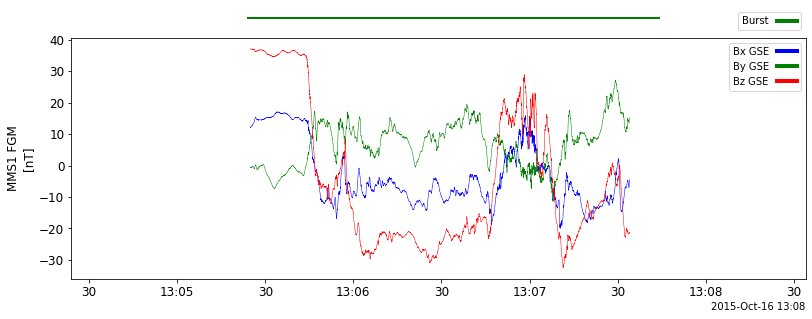

In [15]:
tplot(['mms_bss_burst', 'mms1_fgm_b_gse_brst_l2_bvec'])

Compare the time stamps (survey mode vs. burst mode)

In [ ]:
from pyspedas import get_data

In [ ]:
brst = get_data('mms1_fgm_b_gse_brst_l2_bvec')
srvy = get_data('mms1_fgm_b_gse_srvy_l2_bvec')

Survey mode: data point every 0.125 seconds

In [18]:
srvy.times[1]-srvy.times[0]

0.1250009536743164

Burst mode: data point every 0.0078 seconds (where data are available)

In [19]:
brst.times[1]-brst.times[0]

0.007812023162841797